In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
estimates = pd.read_csv('./data/result.csv')

In [32]:
estimates['eta_ape'] = abs((estimates['eta'] - estimates['ata']) / estimates['ata'])
estimates['hongijan_ape'] = abs((estimates['hongijan'] - estimates['ata']) / estimates['ata'])

In [33]:
estimates.head(1)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
      <th>eta_ape</th>
      <th>hongijan_ape</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>6325513</td>
      <td>772</td>
      <td>1021</td>
      <td>2018-11-23 16:56:39</td>
      <td>1054.228023</td>
      <td>0.243879</td>
      <td>0.032545</td>
    </tr>
  </tbody>
</table>
</div>

In [34]:
estimates.sort_values(by='ata', inplace=True)

In [35]:
estimates.head(2)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>rideId</th>
      <th>eta</th>
      <th>ata</th>
      <th>createdAt</th>
      <th>hongijan</th>
      <th>eta_ape</th>
      <th>hongijan_ape</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>51848</th>
      <td>574051515</td>
      <td>873</td>
      <td>900</td>
      <td>2018-11-18 14:18:10</td>
      <td>1307.901675</td>
      <td>0.030000</td>
      <td>0.453224</td>
    </tr>
    <tr>
      <th>57828</th>
      <td>1223612159</td>
      <td>947</td>
      <td>900</td>
      <td>2018-11-20 07:55:12</td>
      <td>1058.388816</td>
      <td>0.052222</td>
      <td>0.175988</td>
    </tr>
  </tbody>
</table>
</div>

In [36]:
estimates_withoutna = estimates[~estimates['hongijan'].isna()]

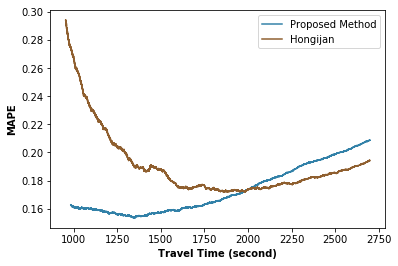

In [37]:
fig = plt.figure()
# plt.title('error w.r.t. duration')
plt.plot(estimates['ata'], estimates['eta_ape'].rolling(15000).mean(), color="#3281a8", label='Proposed Method')
plt.plot(estimates_withoutna['ata'], estimates_withoutna['hongijan_ape'].rolling(10000).mean(), color="#8f5f2f", label='Hongijan')
plt.xlabel('Travel Time (second)', fontweight='bold')
plt.ylabel('MAPE', fontweight='bold')
plt.legend()
fig.savefig('plots/error-duration.png', dpi=1000)
